# Topic modeling con Latent Dirichlet Allocation (LDA)

## Importación de librerías

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Ajustables

In [ ]:
ruta_libros_limpiado = '/content/drive/MyDrive/ESCOM/8vo Semestre/NLP/librosLimpiado.csv'
ruta_perplexity_scores = '/content/drive/MyDrive/ESCOM/8vo Semestre/NLP/perplexityScores4.pkl'
ruta_libros_topic_modeling = '/content/drive/MyDrive/ESCOM/8vo Semestre/NLP/librosTopic.csv'

In [ ]:
df = pd.read_csv(ruta_libros_limpiado)

## Evalución del modelo con la métrica perplexity

In [ ]:
def evaluate_num_topics2(abstracts_list, min_topics, max_topics, step):
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(abstracts_list)
    perplexity_scores = []

    for num_topics in range(min_topics, max_topics + 1, step):
        lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
        lda.fit(X)
        perplexity_scores.append(lda.perplexity(X))
        print(f"Number of Topics: {num_topics}, Perplexity score: {lda.perplexity(X)}")

    # Crear una figura más grande
    plt.figure(figsize=(10, 6))

    # Plotear perplexity scores con color azul
    plt.plot(range(min_topics, max_topics + 1, step), perplexity_scores, marker='o')

    # Configuraciones del gráfico
    plt.xlabel("Número de temas")
    plt.ylabel("Perplexity")
    plt.title("Perplexity (Menor es mejor)")
    plt.grid(True)

    # Establecer los números de temas en el eje x
    plt.xticks(range(min_topics, max_topics + 1, step))

    plt.savefig("perplexity_plot.png", dpi=300)

    # Mostrar el gráfico
    plt.show()

    return perplexity_scores

Number of Topics: 2, Perplexity score: 6943.70667434502
Number of Topics: 3, Perplexity score: 6913.022673992593
Number of Topics: 4, Perplexity score: 7221.176163328897
Number of Topics: 5, Perplexity score: 7206.349631617767
Number of Topics: 6, Perplexity score: 7270.333604217352
Number of Topics: 7, Perplexity score: 7445.629413511375
Number of Topics: 8, Perplexity score: 7575.558381883962
Number of Topics: 9, Perplexity score: 7659.458906229394
Number of Topics: 10, Perplexity score: 7729.735115381332
Number of Topics: 11, Perplexity score: 7843.62175320777
Number of Topics: 12, Perplexity score: 7987.978178776068
Number of Topics: 13, Perplexity score: 8006.370534340834
Number of Topics: 14, Perplexity score: 8096.598887543856
Number of Topics: 15, Perplexity score: 8210.891443465089
Number of Topics: 16, Perplexity score: 8243.291415063914
Number of Topics: 17, Perplexity score: 8351.684504876648
Number of Topics: 18, Perplexity score: 8485.071421635495
Number of Topics: 19, Pe

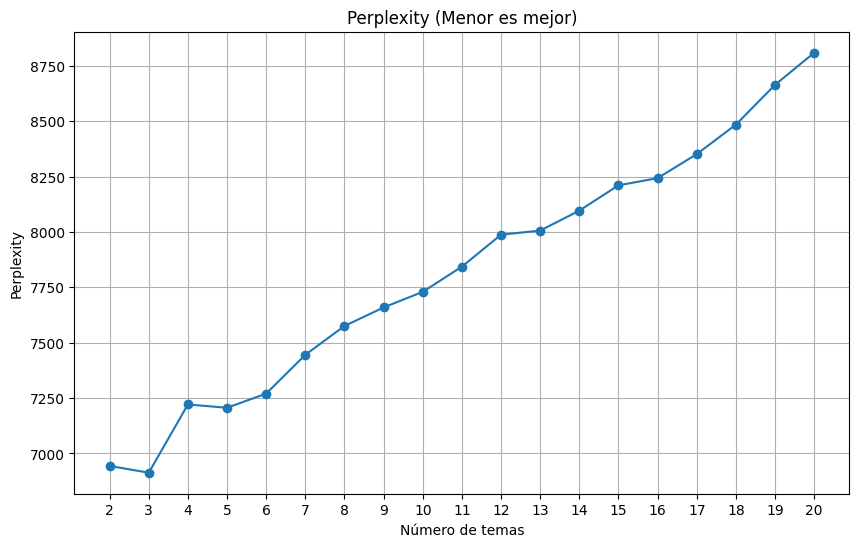

In [ ]:
perplexity_scores = evaluate_num_topics2(df['Normalización'], min_topics=2, max_topics= 20, step=1)

with open(ruta_perplexity_scores, 'wb') as file:
    pickle.dump(perplexity_scores, file)

## Evalución del modelo con la métrica coherence

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence(abstracts_list):
    # Tokenize the abstracts
    tokenized_abstracts = [abstract.split(' ') for abstract in abstracts_list]

    # Create a Gensim Dictionary object
    dictionary = Dictionary(tokenized_abstracts)

    # Create a list of term lists for each document
    corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_abstracts]

    coherence_scores = []
    num_topics_range = range(2, 21)  # Range of number of topics to evaluate

    for num_topics in num_topics_range:
        # Create an LDA model with increased passes and iterations
        lda = LdaModel(corpus, id2word=dictionary, num_topics=num_topics,
                       random_state=0, passes=10, iterations=200)

        # Get the term distribution for each topic
        topic_tokens = [[dictionary[term_id] for term_id, _ in lda.get_topic_terms(topic_id)] for topic_id in range(num_topics)]

        # Create a CoherenceModel object with the corpus, dictionary, and topic tokens
        coherence_model = CoherenceModel(
            topics=topic_tokens,
            texts=tokenized_abstracts,
            dictionary=dictionary,
            coherence='c_v'  # You can choose the type of coherence metric ('c_v', 'u_mass', 'c_uci', 'c_npmi')
        )

        coherence_scores.append(coherence_model.get_coherence())

    # Return the coherence metric results for each number of topics
    return coherence_scores


Number of Topics: 2, Coherence score: 0.40896648494272636
Number of Topics: 3, Coherence score: 0.3716701049710878
Number of Topics: 4, Coherence score: 0.3998661306201906
Number of Topics: 5, Coherence score: 0.3955336718367669
Number of Topics: 6, Coherence score: 0.48168344416545206
Number of Topics: 7, Coherence score: 0.44096671085397626
Number of Topics: 8, Coherence score: 0.3920881065978184
Number of Topics: 9, Coherence score: 0.3435737379063796
Number of Topics: 10, Coherence score: 0.4205041952078067
Number of Topics: 11, Coherence score: 0.40064978527501743
Number of Topics: 12, Coherence score: 0.48319799057001306
Number of Topics: 13, Coherence score: 0.4003820385189251
Number of Topics: 14, Coherence score: 0.41540812381824094
Number of Topics: 15, Coherence score: 0.48479925277723185
Number of Topics: 16, Coherence score: 0.3982765253922757
Number of Topics: 17, Coherence score: 0.43571911500365135
Number of Topics: 18, Coherence score: 0.4684978117626923
Number of Topi

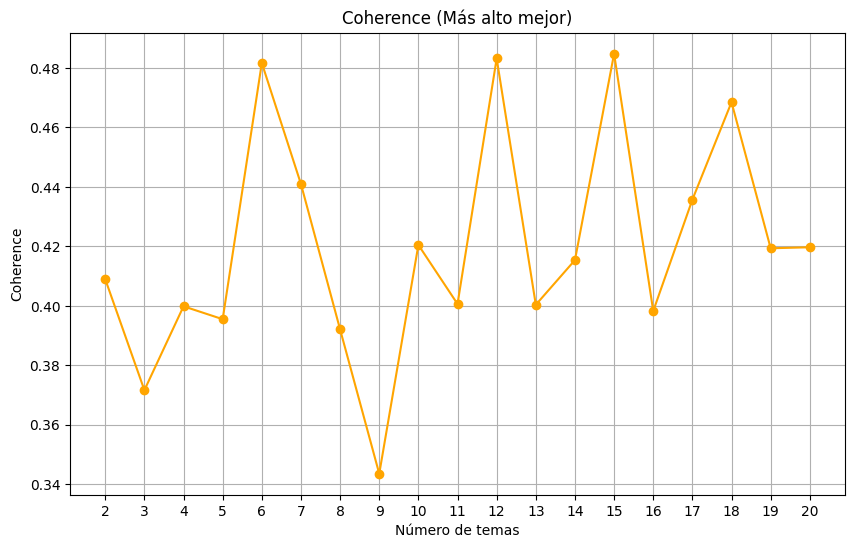

In [ ]:
# Obtener los puntajes de coherencia
coherence_scores = compute_coherence(df['Normalización'])
for i, score in enumerate(coherence_scores):
    num_topics = i + 2  # Adjust the index to start at 2
    print(f"Number of Topics: {num_topics}, Coherence score: {score}")

# Rango de números de temas evaluados
num_topics_range = range(2, 21)

# Crear una figura más grande
plt.figure(figsize=(10, 6))  # Adjust the dimensions as needed

# Graficar los puntajes de coherencia
plt.plot(num_topics_range, coherence_scores, marker='o', color='orange')
plt.xlabel('Número de temas')
plt.ylabel('Coherence')
plt.title('Coherence (Más alto mejor)')

# Agregar retícula
plt.grid(True)

# Establecer los números de temas en el eje x
plt.xticks(num_topics_range, num_topics_range)

plt.savefig("Coherence_plot.png", dpi=300)

# Mostrar el gráfico
plt.show()

## Gráfico comparativo perplexity y coherence

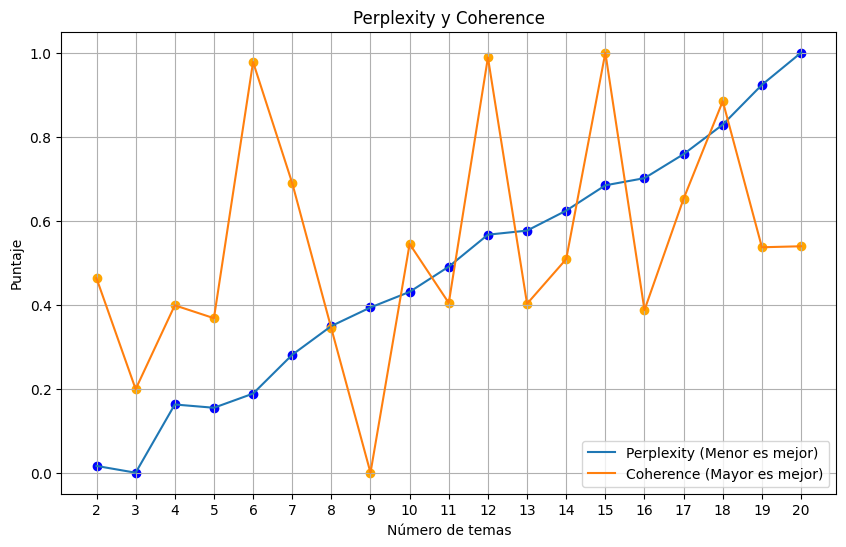

In [ ]:
min_topics = 2
max_topics = 20
# Crear una figura más grande
plt.figure(figsize=(10, 6))  # Adjust the dimensions as needed

# Escalando los valores
scaled_perplexity_scores = [(score - min(perplexity_scores)) / (max(perplexity_scores) - min(perplexity_scores)) for score in perplexity_scores]
scaled_coherence_scores = [(score - min(coherence_scores)) / (max(coherence_scores) - min(coherence_scores)) for score in coherence_scores]

# Plotear los valores escalados
plt.plot(scaled_perplexity_scores, label='Perplexity (Menor es mejor)')
plt.plot(scaled_coherence_scores, label='Coherence (Mayor es mejor)')

# Marcar los puntos
plt.scatter(range(len(perplexity_scores)), scaled_perplexity_scores, color='blue')
plt.scatter(range(len(coherence_scores)), scaled_coherence_scores, color='orange')

# Configuraciones del gráfico
plt.xlabel('Número de temas')
plt.ylabel('Puntaje')
plt.title('Perplexity y Coherence')
plt.legend()

# Agregar retícula
plt.grid(True)

# Establecer los números de temas en el eje x
plt.xticks(range(len(perplexity_scores)), range(min_topics, max_topics + 1))

plt.savefig("Coherence_vs_Perplexity_plot.png", dpi=300)

# Mostrar el gráfico
plt.show()

Como se aprecia en el gráfico, el punto donde perplexity es menor y coherence es mayor es con 6 topics

## Entrenamiento del modelo

In [ ]:
count_vectorizer = CountVectorizer()
# Creates the topics
def topic_creator(abstracts_list):

  X = count_vectorizer.fit_transform(abstracts_list)
  # Creating 3 topics
  lda = LatentDirichletAllocation(n_components=6, random_state=0)
  lda.fit(X)

  feature_names = count_vectorizer.get_feature_names_out()
  for topic_id, topic in enumerate(lda.components_):
      print(f"Topic {topic_id}:")
      print(" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]]))

  return lda

In [ ]:
# Given an abstract it returns the similarity of that abstract to each topic
def topic_distribution(text, lda):

  new_doc_bow = count_vectorizer.transform(text.split(' '))

  topic_distribution = lda.transform(new_doc_bow)

  # Dictionary containing topics and the distribution of the abstract with each of them
  distribution_of_topics = {}

  for topic_idx, topic_prob in enumerate(topic_distribution[0]):
    distribution_of_topics[topic_idx] = topic_prob


  return distribution_of_topics

### Palabras representativas a cada topic

In [ ]:
lda = topic_creator(df['Normalización'])
df['Topic Distribution'] = df.apply(lambda fila: topic_distribution(fila['Normalización'], lda), axis=1)

Topic 0:
libro cine fotografía ensayo mundo
Topic 1:
libro terror él historia suspenso
Topic 2:
derecho obra libro méxico él
Topic 3:
él libro arte ciudad mundo
Topic 4:
filosofía libro obra ensayo literario
Topic 5:
vida él humano libro desarrollo


### Almacenamiento de los `topic_distribution`

In [ ]:
df.to_csv(ruta_libros_topic_modeling, index=False)

## Pruebas

### Distancia euclidiana

In [ ]:
import numpy as np

# Definir la distribución objetivo
distribucion_objetivo = {0: 0.583121915183577, 1: 0.0833352365882038, 2: 0.08333337663935135, 3: 0.08337779804310773, 4: 0.0833483889066023, 5: 0.08348328463915791}  # Ejemplo de distribución objetivo

# Función para convertir el diccionario en un arreglo
def dict_a_array(dict_dist, num_topics=6):
    return np.array([dict_dist.get(i, 0) for i in range(num_topics)])

# Función para calcular la distancia euclidiana
def distancia_euclidiana(distribucion1, distribucion2):
    return np.linalg.norm(distribucion1 - distribucion2)

# Aplicar la conversión y calcular la distancia
df['Distancia'] = df['Topic Distribution'].apply(lambda x: distancia_euclidiana(dict_a_array(x), dict_a_array(distribucion_objetivo)))

# Encontrar la fila con la menor distancia
top_5_mas_cercanos = df.sort_values('Distancia').head(20)
top_5_mas_cercanos


,ISBN,Título,Género,Autor,Editorial,Número de Páginas,Fecha de Publicación,Sinopsis,Portada,URL,Normalización,Topic Distribution,Distancia,Similitud_JS
471,9788467937671,HARRY POTTER: LOS ARCHIVOS DE LAS PELICULAS 3:...,Cine,Jody Revenson,Norma,64,2020,Desde el diario de Tom Riddle y la copa de Hel...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/harry-potter-los-arc...,HARRY POTTER : ARCHIVOS PELICULAS 3 : HORROCRU...,"{0: 0.583121915183577, 1: 0.0833352365882038, ...",0.000000,1.000000
1233,9788467937428,HARRY POTTER: LOS ARCHIVOS DE LAS PELICULAS 1,Cine,Jody Revenson,Norma,64,2019,EL PRIMER VOLUMEN DE UNA NUEVA COLECCIO´N DE L...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/harry-potter-los-arc...,HARRY POTTER : ARCHIVOS PELICULAS 1 Cine Jody ...,"{0: 0.583121915183577, 1: 0.0833352365882038, ...",0.000000,1.000000
22,9788467937664,HARRY POTTER: LOS ARCHIVOS DE LAS PELICULAS 2,Cine,Jody Revenson,Norma,64,2019,EL SEGUNDO VOLUMEN DE LA NUEVA COLECCIÓN DE LI...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/harry-potter-los-arc...,HARRY POTTER : ARCHIVOS PELICULAS 2 Cine Jody ...,"{0: 0.583121915183577, 1: 0.0833352365882038, ...",0.000000,1.000000
1703,9786071742933,EL LAVADO DE DINERO,Derecho,Víctor Manuel Nando Lefort,Trillas,270,15 de Febrero 2022,"El lavado de dinero, actividad dirigida a la t...",https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/el-lavado-de-dinero-2,lavado dinero Derecho Víctor Manuel Nando Lefo...,"{0: 0.5831096800254443, 1: 0.08333377420371099...",0.000095,0.999884
1751,9786075693682,Cómo no arruinar tus relaciones,Desarrollo Humano,Albert Ellis,Paidós,272,21 de Octubre 2022,¿Has tenido algún fracaso amoroso? ¿Quieres de...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/como-no-arruinar-tus...,arruinar relación Desarrollo Humano Albert Ell...,"{0: 0.5832313607973906, 1: 0.08333355645692318...",0.000129,0.999903
40,9788499106045,Atlas conciso de los músculos,Salud y Ejercicio,Chris Jarmey,Paidotribo,312,2018,"un libro muy completo mostrando huesos, muscul...",https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/atlas-conciso-de-los...,atla conciso músculo Salud Ejercicio Chris Jar...,"{0: 0.5830651947091312, 1: 0.08333400317908475...",0.000137,0.999846
128,9788434223967,ANATOMIA ARTISTICA,Arte,Varios autores,Parramón,96,01 de Abril 2002,Para la práctica del dibujo de la figura human...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/anatomia-artistica-8,ANATOMIA ARTISTICA Arte autor Parramón 01 abri...,"{0: 0.5832418737443118, 1: 0.08333362367973376...",0.000142,0.999892
1829,9788491102106,ANATOMIA HUMANA (INCLUYE VERSION DIGITAL),Salud y Ejercicio,Juan Antonio García-Porrero,Médica Panamericana,839,2019,Esta segunda edición de la obra Anatomía Human...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/anatomia-humana-incl...,ANATOMIA HUMANA ( INCLUYE VERSION DIGITAL ) Sa...,"{0: 0.5832418737443118, 1: 0.08333362367973376...",0.000142,0.999892
2176,9786074486216,ANATOMIA FUNCIONAL PARA FISIOTERAPEUTAS,Salud y Ejercicio,Jutta Hochschild,Manual moderno,577,2017,La evaluación y tratamiento efectivo en fisiot...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/anatomia-funcional-p...,ANATOMIA funcional FISIOTERAPEUTAS Salud Ejerc...,"{0: 0.5832418737443118, 1: 0.08333362367973376...",0.000142,0.999892
2448,9786078276509,Iconografía de La Suave Patria de Ramón López ...,Ensayo Literario,Víctor Manuel Mendiola,El tucán de Virginia,144,24 de Enero 2022,Este\nhermoso libro une la investigación rigur...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/iconografia-de-la-su...,Iconografía Suave Patria Ramón López Velarde E...,"{0: 0.5831823554119911, 1: 0.08333354650079561...",0.000194,0.999773


### Similitud_jensen_shannon

In [ ]:
import numpy as np
from scipy.spatial.distance import jensenshannon

# La misma función para convertir el diccionario en un arreglo
def dict_a_array(dict_dist, num_topics=6):
    return np.array([dict_dist.get(i, 0) for i in range(num_topics)])

# Función para calcular la similitud Jensen-Shannon
def similitud_jensen_shannon(distribucion1, distribucion2):
    # Calcular la distancia Jensen-Shannon
    distancia_js = jensenshannon(distribucion1, distribucion2)
    # Convertir la distancia en similitud (opcional)
    similitud = np.exp(-distancia_js)
    return similitud

# Aplicar la función y calcular la similitud
df['Similitud_JS'] = df['Topic Distribution'].apply(lambda x: similitud_jensen_shannon(dict_a_array(x), dict_a_array(distribucion_objetivo)))

# Encontrar los libros más similares basados en la similitud Jensen-Shannon
top_5_mas_similares = df.sort_values('Similitud_JS', ascending=False).head(20)
top_5_mas_similares


,ISBN,Título,Género,Autor,Editorial,Número de Páginas,Fecha de Publicación,Sinopsis,Portada,URL,Normalización,Topic Distribution,Distancia,Similitud_JS
1233,9788467937428,HARRY POTTER: LOS ARCHIVOS DE LAS PELICULAS 1,Cine,Jody Revenson,Norma,64,2019,EL PRIMER VOLUMEN DE UNA NUEVA COLECCIO´N DE L...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/harry-potter-los-arc...,HARRY POTTER : ARCHIVOS PELICULAS 1 Cine Jody ...,"{0: 0.583121915183577, 1: 0.0833352365882038, ...",0.000000,1.000000
22,9788467937664,HARRY POTTER: LOS ARCHIVOS DE LAS PELICULAS 2,Cine,Jody Revenson,Norma,64,2019,EL SEGUNDO VOLUMEN DE LA NUEVA COLECCIÓN DE LI...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/harry-potter-los-arc...,HARRY POTTER : ARCHIVOS PELICULAS 2 Cine Jody ...,"{0: 0.583121915183577, 1: 0.0833352365882038, ...",0.000000,1.000000
471,9788467937671,HARRY POTTER: LOS ARCHIVOS DE LAS PELICULAS 3:...,Cine,Jody Revenson,Norma,64,2020,Desde el diario de Tom Riddle y la copa de Hel...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/harry-potter-los-arc...,HARRY POTTER : ARCHIVOS PELICULAS 3 : HORROCRU...,"{0: 0.583121915183577, 1: 0.0833352365882038, ...",0.000000,1.000000
1751,9786075693682,Cómo no arruinar tus relaciones,Desarrollo Humano,Albert Ellis,Paidós,272,21 de Octubre 2022,¿Has tenido algún fracaso amoroso? ¿Quieres de...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/como-no-arruinar-tus...,arruinar relación Desarrollo Humano Albert Ell...,"{0: 0.5832313607973906, 1: 0.08333355645692318...",0.000129,0.999903
1829,9788491102106,ANATOMIA HUMANA (INCLUYE VERSION DIGITAL),Salud y Ejercicio,Juan Antonio García-Porrero,Médica Panamericana,839,2019,Esta segunda edición de la obra Anatomía Human...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/anatomia-humana-incl...,ANATOMIA HUMANA ( INCLUYE VERSION DIGITAL ) Sa...,"{0: 0.5832418737443118, 1: 0.08333362367973376...",0.000142,0.999892
2176,9786074486216,ANATOMIA FUNCIONAL PARA FISIOTERAPEUTAS,Salud y Ejercicio,Jutta Hochschild,Manual moderno,577,2017,La evaluación y tratamiento efectivo en fisiot...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/anatomia-funcional-p...,ANATOMIA funcional FISIOTERAPEUTAS Salud Ejerc...,"{0: 0.5832418737443118, 1: 0.08333362367973376...",0.000142,0.999892
128,9788434223967,ANATOMIA ARTISTICA,Arte,Varios autores,Parramón,96,01 de Abril 2002,Para la práctica del dibujo de la figura human...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/anatomia-artistica-8,ANATOMIA ARTISTICA Arte autor Parramón 01 abri...,"{0: 0.5832418737443118, 1: 0.08333362367973376...",0.000142,0.999892
1703,9786071742933,EL LAVADO DE DINERO,Derecho,Víctor Manuel Nando Lefort,Trillas,270,15 de Febrero 2022,"El lavado de dinero, actividad dirigida a la t...",https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/el-lavado-de-dinero-2,lavado dinero Derecho Víctor Manuel Nando Lefo...,"{0: 0.5831096800254443, 1: 0.08333377420371099...",0.000095,0.999884
40,9788499106045,Atlas conciso de los músculos,Salud y Ejercicio,Chris Jarmey,Paidotribo,312,2018,"un libro muy completo mostrando huesos, muscul...",https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/atlas-conciso-de-los...,atla conciso músculo Salud Ejercicio Chris Jar...,"{0: 0.5830651947091312, 1: 0.08333400317908475...",0.000137,0.999846
241,9786075730578,LOS MÉTODOS Y SISTEMAS DE LA TEORÍA DEL DELITO,Derecho,HESBERT BENAVENTE CHORRES,Flores,408,01 de Junio 2023,Consideramos oportuno el diálogo intergeneraci...,https://www.gandhi.com.mx/media/catalog/produc...,https://www.gandhi.com.mx/los-metodos-y-sistem...,MÉTODOS SISTEMAS TEORÍA DELITO Derecho HESBERT...,"{0: 0.583322747880355, 1: 0.08333561141562107,...",0.000253,0.999789
